# Active Subspaces: A Simple Example


Here we mimic Paul Constantine's "basic" tutorial in active subspaces, using a different toy function of only 5 variables. All text directly copied from Paul's original notebook are cited with quotations throughout this notebook.

The function we use for demonstration is:

$$
f(x_1,x_2,x_3,x_4,x_5) = \alpha (x_1+x_2)^2+x_3^2+\epsilon x_4 + (\textit{noise})
$$

We will take $\alpha$ large $-$ of order 4 to begin with, and take $\epsilon$ small $-$ of order $-4$ to begin with. We will let the noise vary within the interval [$-\epsilon$,$\epsilon$]. Further, note that $f$ has no dependence on $x_5$; we expect that this will cause $x_5$ to be inactive. The a priori distributions of each varibale are summarized below; we begin by assuming each varibale has a uniform distribution over [-1,1] to avoid normalization.

Symbol|Distribution (U(min, max))
:-----:|:-----
$x_1$|U(-1, 1)
$x_2$|U(-1, 1)
$x_3$|U(-1, 1)
$x_4$|U(-1, 1)
$x_5$|U(-1, 1)

"For demonstration we initially pretend we don't have the gradient of $f$. In this scenario, you have 3 options: use a global linear model to approximate gradients, use a global quadratic model to approximate gradients, or use local linear models to approximate gradients. We demonstrate each in turn." - Paul C.



In [1]:
%matplotlib inline
import active_subspaces as ac
import numpy as np
import matplotlib.pyplot as plt

E = .0001 # epsilon
A = 10000 # alpha
N = np.random.uniform(-E,E) # noise


def fun(aa):
    #each row of aa should be [x ,y ,z] in the normalized input space
    #returns column vector of function at each row of inputs
    
    a = aa.copy()
    a = np.atleast_2d(a)
    M = a.shape[0]
    
    x = a[:,0]; y = a[:,1]; z = a[:,2]; w = a[:,3]; q = a[:,4];
    
    return (A*(x+y)**2+z**2+E*w+N+0*q).reshape(M, 1)

def fun1(aa):
    
    return (np.log(fun(aa)))

"We first draw a set of inputs from the parameter space according to the distributions in the table above and compute the function's value at each of these points." - Paul C.


In [2]:
M = 10000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
x = np.random.uniform(-1, 1, (M, 1)) #x_1
y = np.random.uniform(-1, 1, (M, 1)) #x_2
z = np.random.uniform(-1, 1, (M, 1)) #x_3
w = np.random.uniform(-1, 1, (M, 1)) #x_4
q = np.random.uniform(-1, 1, (M, 1)) #x_5

#The input matrix
a = np.hstack((x, y, z, w, q))

#The function's output
f = fun(a)

#Upper and lower limits for inputs
lb = np.array([-1, -1, -1, -1, -1]).reshape((1, 5))
ub = np.array([1, 1, 1, 1, 1]).reshape((1, 5))

#ub=np.log(ub)
#lb=np.log(lb)

#We normalize the inputs to the interval [-1, 1]: 

aa = 2.*(a - lb)/(ub - lb) - 1.0

"The following cell instantiates a subspace object and computes the active subspace by fitting a global linear model (this is indicated by the 'sstype='OLS'' flag). The 'nboot=100' flag says to use 100 bootstrap replicates to estimate variability in eigenvalue and subspace error estimates."

-Paul C.



In [8]:
#Instantiate a subspace object
ss = ac.subspaces.Subspaces()

#Compute the subspace with a global linear model (sstype='OLS') and 100 bootstrap replicates
ss.compute(X=aa, f=f, nboot=100, sstype='OLS')

"We plot estimated eigenvalues, subspace errors, and a sufficient summary plot (a plot of the active variable vs data values)."

-Paul C.

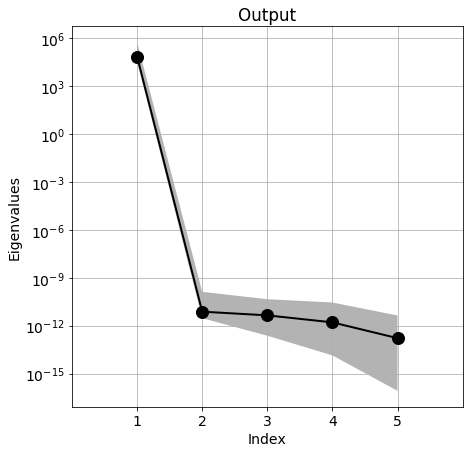

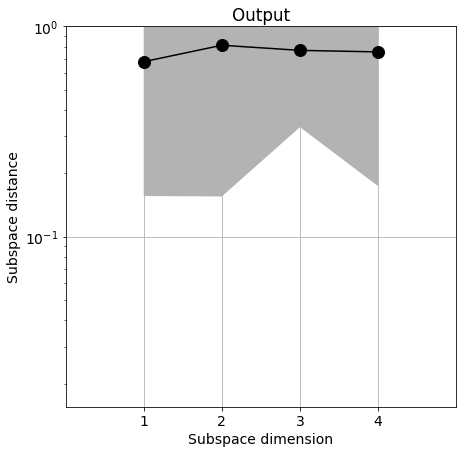

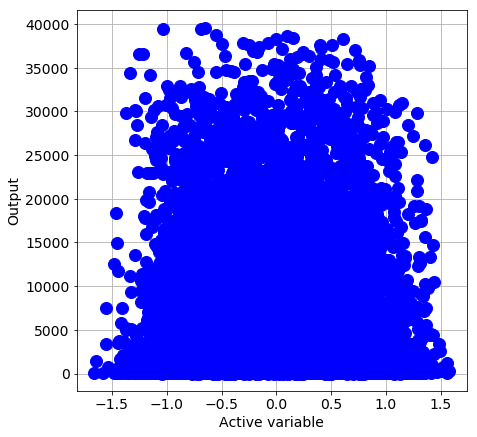

In [9]:
#This plots the eigenvalues (ss.eigenvals) with bootstrap ranges (ss.e_br)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)

#This plots subspace errors with bootstrap ranges (all contained in ss.sub_br)
ac.utils.plotters.subspace_errors(ss.sub_br)

#This makes sufficient summary plots with the active variables (XX.dot(ss.W1)) and output (f)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)


"We now make the same plots with a global quadratic model (sstype='QPHD')." - Paul C.

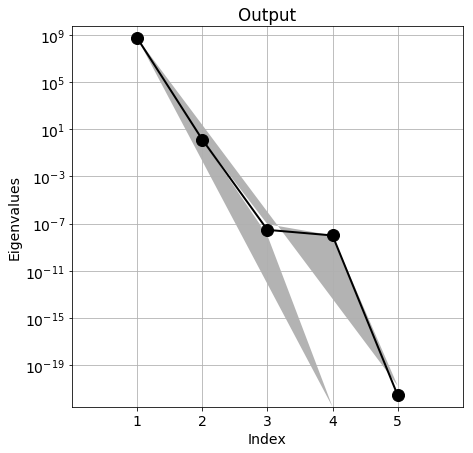

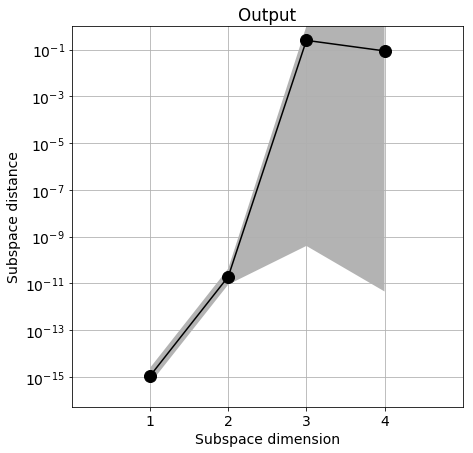

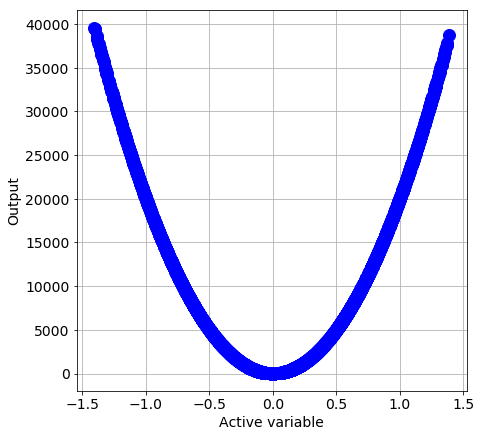

In [5]:
ss.compute(X=aa, f=f, nboot=100, sstype='QPHD')
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

"We now use local linear models to approximate gradients and make the same plots as above." - Paul C.

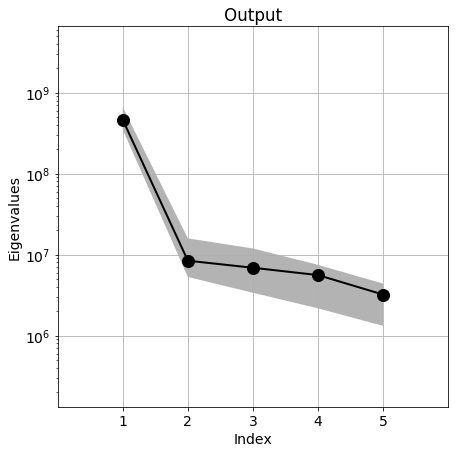

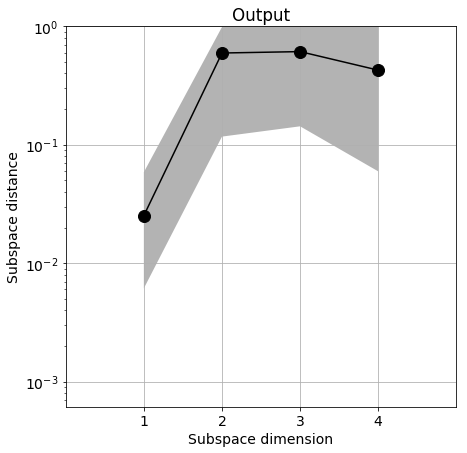

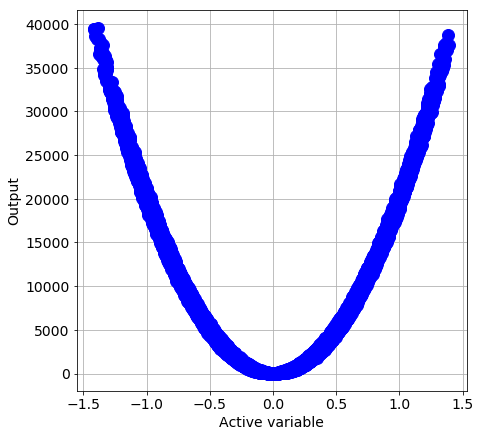

In [6]:
df = ac.gradients.local_linear_gradients(aa, f) #Estimated gradients using local linear models

ss.compute(df=df, nboot=100)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

In [7]:
import pprint

print ss.eigenvecs

[[ 0.70002833  0.10054842  0.32830901  0.2420457   0.57747505]
 [ 0.7135421  -0.07897944 -0.3070234  -0.26884738 -0.56398372]
 [ 0.00382402  0.43234596 -0.82443793  0.07479335  0.35744985]
 [-0.00274206 -0.64354215 -0.18841128 -0.57817019  0.46482943]
 [ 0.02821115 -0.61853273 -0.2876684   0.72750268 -0.06788325]]
